In [2]:
!pip install fastapi[all]

  Using cached fastapi-0.114.1-py3-none-any.whl.metadata (27 kB)
  Using cached starlette-0.38.5-py3-none-any.whl.metadata (6.0 kB)
  Using cached anyio-4.4.0-py3-none-any.whl.metadata (4.6 kB)
Using cached starlette-0.38.5-py3-none-any.whl (71 kB)
Using cached fastapi-0.114.1-py3-none-any.whl (94 kB)
Using cached anyio-4.4.0-py3-none-any.whl (86 kB)


In [4]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------- ----- 10.0/11.6 MB 56.4 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 33.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 사용자 응답 (예시, 각 질문에 대한 답변을 정규화)
user_responses = np.array([0.6, 0.6, 0.4, 0.5, 0.5, 1.0, 0.4, 1.0])

# 보험 상품 벡터 (각 보험 유형에 대한 벡터 설정)
insurance_vectors = {
    '암_기본형': np.array([0.4, 0.4, 0.4, 0.2, 0.2, 1.0, 0.4, 1.0]),
    '암_표준형': np.array([0.6, 0.4, 0.4, 0.5, 0.5, 1.0, 0.4, 1.0]),
    '암_고급형': np.array([1.0, 0.4, 0.4, 1.0, 1.0, 1.0, 0.4, 1.0]),
    '치아_기본형': np.array([0.2, 0.6, 0.6, 0.2, 0.2, 0.0, 0.6, 0.0]),
    '치아_표준형': np.array([0.4, 0.6, 0.6, 0.5, 0.5, 0.0, 0.6, 0.0]),
    '치아_고급형': np.array([0.6, 0.6, 0.6, 1.0, 1.0, 0.0, 0.6, 0.0]),
    'Grade_기본형': np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.6, 1.0]),
    'Grade_표준형': np.array([0.4, 0.2, 0.2, 0.5, 0.5, 0.0, 0.6, 1.0]),
    'Grade_고급형': np.array([0.6, 0.2, 0.2, 1.0, 1.0, 0.0, 0.6, 1.0]),
    '종합_기본형': np.array([0.6, 0.6, 0.6, 0.2, 0.2, 0.5, 0.4, 1.0]),
    '종합_표준형': np.array([0.8, 0.6, 0.6, 0.5, 0.5, 0.5, 0.4, 1.0]),
    '종합_고급형': np.array([1.0, 0.6, 0.6, 1.0, 1.0, 0.5, 0.4, 1.0]),
    '3대질환_기본형': np.array([0.4, 0.4, 0.4, 0.2, 0.2, 1.0, 0.4, 1.0]),
    '3대질환_표준형': np.array([0.6, 0.4, 0.4, 0.5, 0.5, 1.0, 0.4, 1.0]),
    '3대질환_고급형': np.array([1.0, 0.4, 0.4, 1.0, 1.0, 1.0, 0.4, 1.0])
}

# 벡터를 -1과 1로 정규화하는 함수
def normalize_vector(vector):
    return (2 * vector) - 1

# 모든 벡터를 정규화
user_responses_normalized = normalize_vector(user_responses)
insurance_vectors_normalized = {k: normalize_vector(v) for k, v in insurance_vectors.items()}

# 룰 베이스 적용: 사용자 응답에 따라 보험 유형 필터링
def rule_based_filter(user_response):
    filtered_insurance = []
    if user_response[0] >= 0.5:  # 종합 보험 선택
        filtered_insurance = ['종합_기본형', '종합_표준형', '종합_고급형', 'Grade_기본형', 'Grade_표준형', 'Grade_고급형','3대질환_기본형', '3대질환_표준형', '3대질환_고급형']

    else:  # 특정 질병 (암, 치아)
        filtered_insurance = ['암_기본형', '암_표준형', '암_고급형', '치아_기본형', '치아_표준형', '치아_고급형']
    return filtered_insurance

# 필터링된 보험 목록
filtered_insurance_list = rule_based_filter(user_responses)

# 코사인 유사도 계산
similarities = {}
for name in filtered_insurance_list:
    sim = cosine_similarity([user_responses_normalized], [insurance_vectors_normalized[name]])[0][0]
    similarities[name] = sim

# 유사도 높은 순서대로 정렬
top_recommendations = sorted(similarities.items(), key=lambda item: item[1], reverse=True)[:3]

# 결과 출력
print("Top 3 추천 보험:")
for insurance, similarity in top_recommendations:
    print(f"{insurance}: 유사도 {similarity:.2f}")


In [7]:
import random
import faker
import pandas as pd

# Faker 생성
fake = faker.Faker()

# 보험 상품 데이터 (고정)
insurance_list = [
    ("INS010301", "하나로 다모은 종합 건강보험", "Premium", 50000),
    ("INS010302", "하나로 다모은 종합 건강보험", "Basic", 40000),
    ("INS010303", "미니 암보험", "최소형", 30000),
    ("INS010304", "미니 암보험", "최대형", 50000),
    ("INS010305", "미니 치아보험", "기본형", 15000),
    ("INS010306", "미니 치아보험", "프리미엄형", 25000),
    ("INS010307", "간편 3대 질환 보험", "노멀형", 40000),
    ("INS010308", "간편 3대 질환 보험", "프리미엄형", 60000),
    ("INS010309", "미니 Grade 건강보험", "Grade1", 20000),
    ("INS010310", "미니 Grade 건강보험", "Grade2", 26000),
    ("INS010311", "미니 Grade 건강보험", "Grade3", 33000),
    ("INS010312", "미니 Grade 건강보험", "Grade4", 37500),
    ("INS010313", "하나 가득담은 3.2.5 미니건강보험", "3.0.0", 30000),
    ("INS010314", "하나 가득담은 3.2.5 미니건강보험", "3.0.5", 40000),
    ("INS010315", "하나 가득담은 3.2.5 미니건강보험", "3.2.5", 40000)
]

# 사용자와 보험 상품의 상호작용 데이터 생성
def generate_insurance_ratings(num_users=1000):
    data = []
    
    for _ in range(num_users):
        user_id = fake.uuid4()  # 사용자 ID (랜덤 UUID 생성)
        for insurance in insurance_list:
            insurance_id, insurance_name, product_type, base_price = insurance

            # 같은 보험 이름의 마지막 보험에 더 높은 평점을 부여
            if insurance_id[-1] == "5":  # 보험 ID가 "5"로 끝나는 경우(같은 이름 중 마지막)
                rating = random.uniform(4.0, 5.0)  # 높은 평점
            else:
                rating = random.uniform(3.0, 4.5)  # 보통 평점

            # 랜덤 구매 횟수 및 상호작용 시간
            interactions = random.randint(1, 10)
            total_spent = base_price * interactions

            data.append({
                "user_id": user_id,
                "insurance_id": insurance_id,
                "insurance_name": insurance_name,
                "product_type": product_type,
                "base_price": base_price,
                "rating": round(rating, 1),
                "interactions": interactions,
                "total_spent": total_spent
            })
    
    return pd.DataFrame(data)

# 1000명의 사용자 데이터 생성
df = generate_insurance_ratings(num_users=1000)

# 생성된 데이터를 출력
print(df.head())

                                user_id insurance_id   insurance_name  \
0  02bdd342-618f-4434-a3b8-e40da6718933    INS010301  하나로 다모은 종합 건강보험   
1  02bdd342-618f-4434-a3b8-e40da6718933    INS010302  하나로 다모은 종합 건강보험   
2  02bdd342-618f-4434-a3b8-e40da6718933    INS010303           미니 암보험   
3  02bdd342-618f-4434-a3b8-e40da6718933    INS010304           미니 암보험   
4  02bdd342-618f-4434-a3b8-e40da6718933    INS010305          미니 치아보험   

  product_type  base_price  rating  interactions  total_spent  
0      Premium       50000     4.3             3       150000  
1        Basic       40000     3.4             1        40000  
2          최소형       30000     4.0             6       180000  
3          최대형       50000     3.8             2       100000  
4          기본형       15000     4.8             7       105000  


In [9]:
import torch
print(torch.cuda.is_available())

False


In [25]:
import pandas as pd
import os
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.general_recommender import BPR
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger
import logging

# 1. Faker를 사용하여 사용자 데이터 생성
def generate_user_data(num_users):
    import random
    from faker import Faker
    fake = Faker()

    insurance_data = [
        ("INS010301", "하나로 다모은 종합 건강보험", 50000),
        ("INS010302", "하나로 다모은 종합 건강보험", 40000),
        ("INS010303", "미니 암보험", 30000),
        ("INS010304", "미니 암보험", 50000),
        ("INS010305", "미니 치아보험", 15000),
        ("INS010306", "미니 치아보험", 25000),
        ("INS010307", "간편 3대 질환 보험", 40000),
        ("INS010308", "간편 3대 질환 보험", 60000),
        ("INS010309", "미니 Grade 건강보험", 20000),
        ("INS010310", "미니 Grade 건강보험", 26000),
        ("INS010311", "미니 Grade 건강보험", 33000),
        ("INS010312", "미니 Grade 건강보험", 37500),
        ("INS010313", "하나 가득담은 3.2.5 미니건강보험", 30000),
        ("INS010314", "하나 가득담은 3.2.5 미니건강보험", 40000),
        ("INS010315", "하나 가득담은 3.2.5 미니건강보험", 40000),
        ("INS010316", "일상생활 종합보험", 50000),
        ("INS010317", "가족 보장 보험", 60000),
        ("INS010318", "여행자 보험", 20000)
    ]

    user_data = []
    for _ in range(num_users):
        user_id = fake.uuid4()
        insurance_history = random.sample(insurance_data, random.randint(2, 5))
        for insurance in insurance_history:
            rating = 4.7 - (int(insurance[0][-1]) * 0.1)
            user_data.append({
                "user_id": user_id,
                "insurance_id": insurance[0],
                "rating": rating
            })

    return pd.DataFrame(user_data).fillna(0)

# 2. 데이터 생성 및 저장
user_data = generate_user_data(10000)
print(user_data.isnull().sum())  # NaN 값 체크

# RecBole 형식으로 저장
os.makedirs("dataset/user_data", exist_ok=True)
header = "user_id:token\tinsurance_id:token\trating:float"
with open("dataset/user_data/user_data.inter", 'w') as f:
    f.write(header + "\n")
user_data.to_csv("dataset/user_data/user_data.inter", mode='a', index=False, sep="\t", header=False)

# 3. RecBole 설정 파일 생성
config_content = """
dataset: user_data
field_separator: "\\t"
USER_ID_FIELD: user_id
ITEM_ID_FIELD: insurance_id
RATING_FIELD: rating
load_col:
  inter: [user_id, insurance_id, rating]

training_epochs: 3
train_batch_size: 32
embedding_size: 16
log_interval: 1
"""

with open('config.yaml', 'w') as file:
    file.write(config_content)

# 4. RecBole 모델 학습 및 평가
config = Config(model='BPR', dataset='user_data', config_file_list=['config.yaml'])

# 로그 설정 및 시드 초기화
init_seed(config['seed'], config['reproducibility'])

# 로그 파일로 출력 설정 (stdout 대신 파일로 기록)
logging.basicConfig(level=logging.ERROR, filename='recbole_log.log')

# 데이터셋 생성
dataset = create_dataset(config)
print("데이터셋 생성 완료:", dataset)

# 데이터 준비 (훈련, 검증, 테스트)
train_data, valid_data, test_data = data_preparation(config, dataset)

# BPR 모델 생성 및 GPU로 이동
model = BPR(config, train_data.dataset).to(config['device'])

# 트레이너 생성 및 모델 학습
trainer = Trainer(config, model)

# 학습 수행
try:
    best_valid_score, best_valid_result = trainer.fit(train_data)
except Exception as e:
    logging.error(f"Error during training: {e}")
    print(f"Error during training: {e}")

# 모델 평가
test_result = trainer.evaluate(test_data)
print("테스트 결과:", test_result)


ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.1.

In [24]:
pip install numpy==2.0

   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------- ----------------------------- 4.5/16.5 MB 26.9 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.5 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 16.5/16.5 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np

# Check the version of NumPy
np.__version__

'2.1.1'

In [29]:
pip uninstall numba numpy

^C
Note: you may need to restart the kernel to use updated packages.


: 

In [1]:
pip install pandas numpy matplotlib seaborn


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/7.8 MB 6.7 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 스타일 설정
sns.set(style="whitegrid")
%matplotlib inline


# CSV 파일 경로 지정
csv_file_path = 'Fixedclaims2.csv'  # 실제 파일 경로로 변경하세요

# 데이터프레임으로 불러오기
df = pd.read_csv(csv_file_path)

# 데이터프레임의 첫 몇 행 확인
print(df.head())


                 ACCIDENT_DATE STATUS CLAIM_ID CONTRACT_ID        MEMBER_ID  \
0  24/07/07 00:00:00.000000000  승인 완료  C100235  17510-1366  3ca154f1-a316-4   
1  24/01/31 00:00:00.000000000  승인 완료  C100236  17510-0697  9a8c7275-c1df-4   
2  24/05/19 00:00:00.000000000  승인 완료  C100237  17510-0656  86f968c4-ecb4-4   
3  24/07/06 00:00:00.000000000  승인 완료  C100238  17510-1198  829f2c8d-50b1-4   
4  24/03/16 00:00:00.000000000  승인 완료  C100239  17510-0215  826178fb-f44d-4   

   CLAIM_DETAILS DOCUMENT_ISSUER  DOCUMENTS CLAIM_TYPE  \
0            NaN        유한회사 김최박        NaN       교통사고   
1            NaN          사기 발급처        NaN       교통사고   
2            NaN           (주) 박        NaN         기타   
3            NaN         (유) 이박송        NaN       교통사고   
4            NaN        유한회사 김김우        NaN       교통사고   

                 REPORTED_DATE  FRAUD_SCORE  
0  24/07/31 00:00:00.000000000           33  
1  27/02/15 00:00:00.000000000          100  
2  24/06/08 00:00:00.000000000        

In [32]:
# 데이터프레임의 기본 정보 확인
print(df.info())

# 통계적 요약 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACCIDENT_DATE    2000 non-null   object 
 1   STATUS           2000 non-null   object 
 2   CLAIM_ID         2000 non-null   object 
 3   CONTRACT_ID      2000 non-null   object 
 4   MEMBER_ID        2000 non-null   object 
 5   CLAIM_DETAILS    0 non-null      float64
 6   DOCUMENT_ISSUER  2000 non-null   object 
 7   DOCUMENTS        0 non-null      float64
 8   CLAIM_TYPE       2000 non-null   object 
 9   REPORTED_DATE    2000 non-null   object 
 10  FRAUD_SCORE      2000 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 172.0+ KB
None
       CLAIM_DETAILS  DOCUMENTS  FRAUD_SCORE
count            0.0        0.0  2000.000000
mean             NaN        NaN    93.641500
std              NaN        NaN   119.536281
min              NaN        NaN     0.000000
2

In [33]:
# FRAUD_SCORE 컬럼을 숫자 타입으로 변환 (오류 발생 시 NaN으로 처리)
df['FRAUD_SCORE'] = pd.to_numeric(df['FRAUD_SCORE'], errors='coerce')

# 변환 후 데이터 타입 확인
print(df['FRAUD_SCORE'].dtype)


int64


count    2000.000000
mean       93.641500
std       119.536281
min         0.000000
25%        21.000000
50%        39.000000
75%        96.250000
max       699.000000
Name: FRAUD_SCORE, dtype: float64


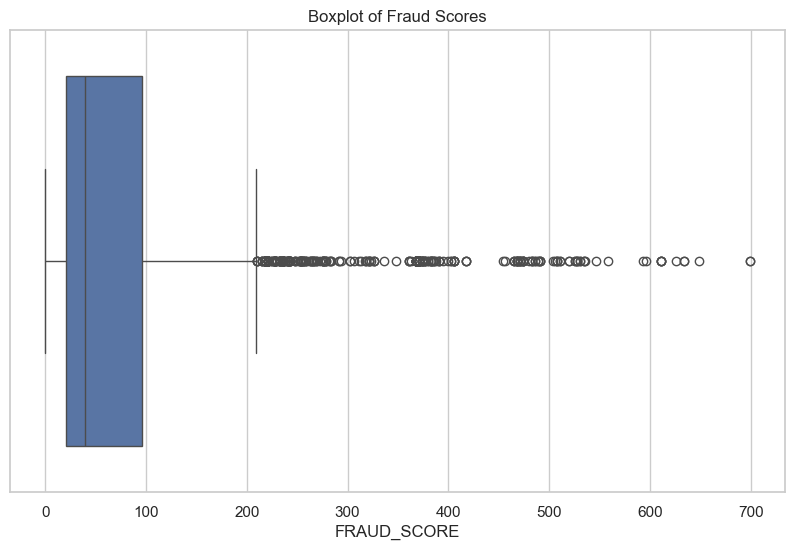

Upper bound for FRAUD_SCORE: 209.125


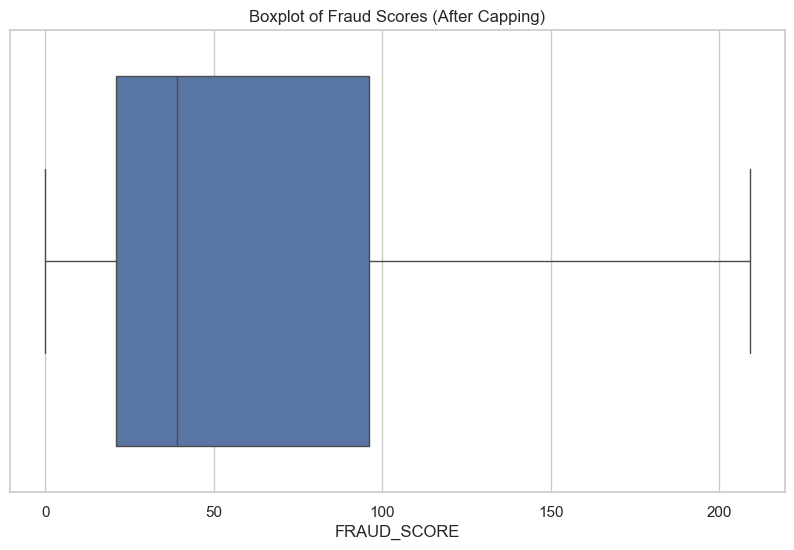

In [17]:
# 기초 통계 확인
print(df['FRAUD_SCORE'].describe())

# 박스플롯을 통한 이상치 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['FRAUD_SCORE'])
plt.title('Boxplot of Fraud Scores')
plt.show()

# 이상치 상한선 계산 (IQR 방법)
Q1 = df['FRAUD_SCORE'].quantile(0.25)
Q3 = df['FRAUD_SCORE'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for FRAUD_SCORE: {upper_bound}")

# 이상치를 최대값으로 대체
df['FRAUD_SCORE'] = np.where(df['FRAUD_SCORE'] > upper_bound, upper_bound, df['FRAUD_SCORE'])

# 다시 박스플롯 확인
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['FRAUD_SCORE'])
plt.title('Boxplot of Fraud Scores (After Capping)')
plt.show()


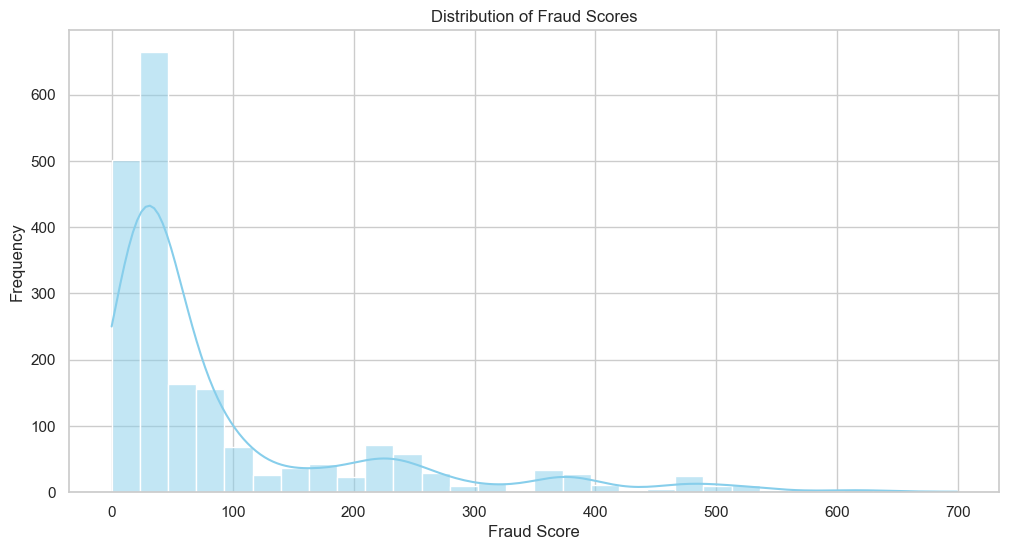

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df['FRAUD_SCORE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fraud Scores')
plt.xlabel('Fraud Score')
plt.ylabel('Frequency')
plt.show()


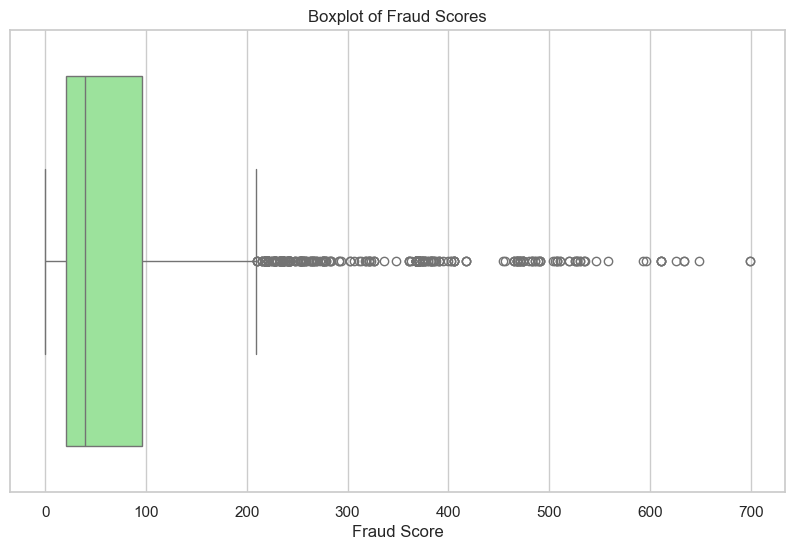

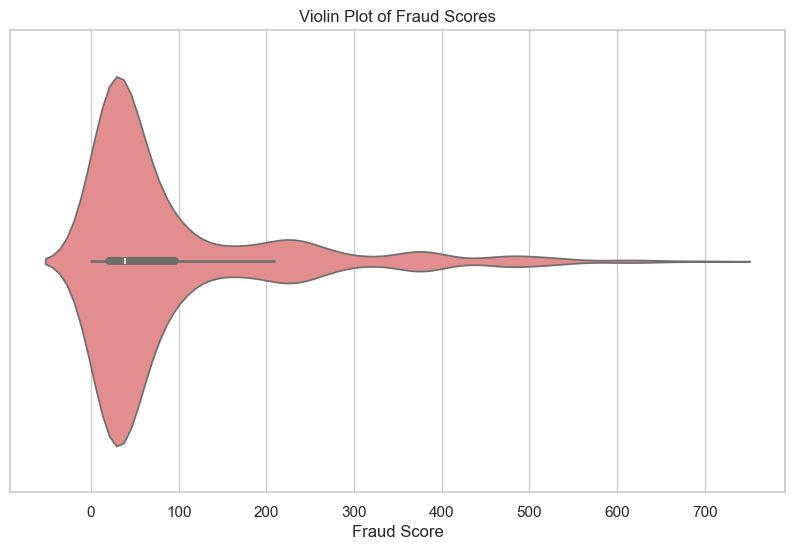

In [35]:
# 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['FRAUD_SCORE'], color='lightgreen')
plt.title('Boxplot of Fraud Scores')
plt.xlabel('Fraud Score')
plt.show()

# 바이올린 플롯
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['FRAUD_SCORE'], color='lightcoral')
plt.title('Violin Plot of Fraud Scores')
plt.xlabel('Fraud Score')
plt.show()


In [36]:
# 통계적 요약
fraud_stats = df['FRAUD_SCORE'].describe()
print(fraud_stats)


count    2000.000000
mean       93.641500
std       119.536281
min         0.000000
25%        21.000000
50%        39.000000
75%        96.250000
max       699.000000
Name: FRAUD_SCORE, dtype: float64


In [37]:

# 백분위수 계산
percentiles = np.array([0, 25, 50, 75, 90, 95, 99, 100])  # 리스트를 numpy 배열로 변환
fraud_percentiles = df['FRAUD_SCORE'].quantile(percentiles / 100)  # 백분위수 계산
print(fraud_percentiles)


0.00      0.00
0.25     21.00
0.50     39.00
0.75     96.25
0.90    253.10
0.95    374.00
0.99    528.00
1.00    699.00
Name: FRAUD_SCORE, dtype: float64


In [43]:
# 상위 95% 점수 계산
threshold_95 = df['FRAUD_SCORE'].quantile(0.9)
print(f"95th Percentile Fraud Score: {threshold_95}")

# 상위 99% 점수 계산
threshold_99 = df['FRAUD_SCORE'].quantile(0.99)
print(f"99th Percentile Fraud Score: {threshold_99}")


95th Percentile Fraud Score: 253.10000000000014
99th Percentile Fraud Score: 528.0


In [45]:
# 95th Percentile 기준
fraud_95 = df[df['FRAUD_SCORE'] >= threshold_95]
fraud_percentage_95 = (len(fraud_95) / len(df)) * 100
print(f"Claims with FRAUD_SCORE >= 95th percentile ({threshold_95}): {fraud_percentage_95:.2f}%")

# 99th Percentile 기준
fraud_99 = df[df['FRAUD_SCORE'] >= threshold_99]
fraud_percentage_99 = (len(fraud_99) / len(df)) * 100
print(f"Claims with FRAUD_SCORE >= 99th percentile ({threshold_99}): {fraud_percentage_99:.2f}%")


Claims with FRAUD_SCORE >= 95th percentile (253.10000000000014): 10.00%
Claims with FRAUD_SCORE >= 99th percentile (528.0): 1.10%


Selected Fraud Threshold: 253.10000000000014
Fraud Claims Percentage: 10.00%


C:\Users\최준혁\AppData\Local\Temp\ipykernel_28136\662613353.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df, palette='Set1')


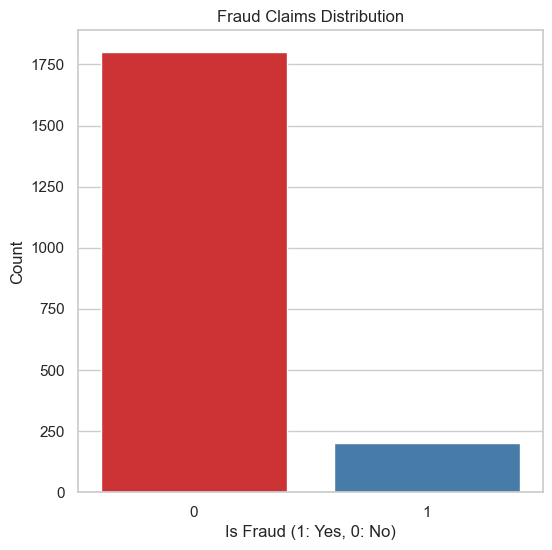

In [46]:
# 상위 95% 임계값
threshold = threshold_95

# 임계값 출력
print(f"Selected Fraud Threshold: {threshold}")

# 임계값을 기준으로 새로운 컬럼 생성
df['is_fraud'] = np.where(df['FRAUD_SCORE'] >= threshold, 1, 0)

# 사기 청구 비율 확인
fraud_ratio = df['is_fraud'].mean() * 100
print(f"Fraud Claims Percentage: {fraud_ratio:.2f}%")

# 사기 청구 비율 시각화
plt.figure(figsize=(6, 6))
sns.countplot(x='is_fraud', data=df, palette='Set1')
plt.title('Fraud Claims Distribution')
plt.xlabel('Is Fraud (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


In [64]:


# CSV 파일 경로 지정
csv_file_path = 'Fixedclaims2.csv'  # 실제 파일 경로로 변경하세요

# 데이터프레임으로 불러오기
claims_df = pd.read_csv(csv_file_path)

# 1. FRAUD_SCORE가 250 이상인 경우 97% 확률로 거부
mask_250 = claims_df['FRAUD_SCORE'] >= 250
claims_df.loc[mask_250, 'STATUS'] = np.where(
    np.random.rand(mask_250.sum()) < 0.97,  # 확률 계산을 위한 배열 생성
    '거부',
    claims_df.loc[mask_250, 'STATUS']
)

# 2. FRAUD_SCORE가 200 이상 250 미만인 경우 70% 확률로 거부
mask_200_250 = (claims_df['FRAUD_SCORE'] >= 200) & (claims_df['FRAUD_SCORE'] < 250)
claims_df.loc[mask_200_250, 'STATUS'] = np.where(
    np.random.rand(mask_200_250.sum()) < 0.3,  # 확률 계산을 위한 배열 생성
    '거부',
    claims_df.loc[mask_200_250, 'STATUS']
)

# 3. 나머지 (전체 중 3% 무작위로) "거부"
# 전체 데이터 중에서 랜덤하게 3%를 선택하여 '거부'로 변경
num_rows = len(claims_df)
reject_sample_size = int(num_rows * 0.02)
random_reject_indices = claims_df.sample(n=reject_sample_size, random_state=42).index
claims_df.loc[random_reject_indices, 'STATUS'] = '거부'

# 결과 확인
print(claims_df[['FRAUD_SCORE', 'STATUS']].head())

# 결과 CSV로 저장 (필요시)
# claims_df.to_csv('updated_claims.csv', index=False, encoding='utf-8-sig')


   FRAUD_SCORE STATUS
0           33  승인 완료
1          100  승인 완료
2           33  승인 완료
3           87  승인 완료
4          491     거부


In [65]:
claims_df['STATUS'].describe()

count      2000
unique        2
top       승인 완료
freq       1721
Name: STATUS, dtype: object

In [66]:
claims_df.to_csv('updated_claims.csv', index=False, encoding='utf-8-sig')
